## Iris Flower Classification

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Data Preprocessing

#### Checking null values

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.shape

(150, 5)

In [7]:
print(f"This DataSet Contains {df.shape[0]} rows & {df.shape[1]} columns")

This DataSet Contains 150 rows & 5 columns


#### Describing the Dataset

In [8]:
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
sepal_length,150.0,NaN,NaN,NaN,5.843333,0.828066,4.3,5.1,5.8,6.4,7.9
sepal_width,150.0,NaN,NaN,NaN,3.054,0.433594,2.0,2.8,3.0,3.3,4.4
petal_length,150.0,NaN,NaN,NaN,3.758667,1.76442,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,NaN,NaN,NaN,1.198667,0.763161,0.1,0.3,1.3,1.8,2.5
species,150,3,Iris-setosa,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Analysis

<AxesSubplot:xlabel='species', ylabel='count'>

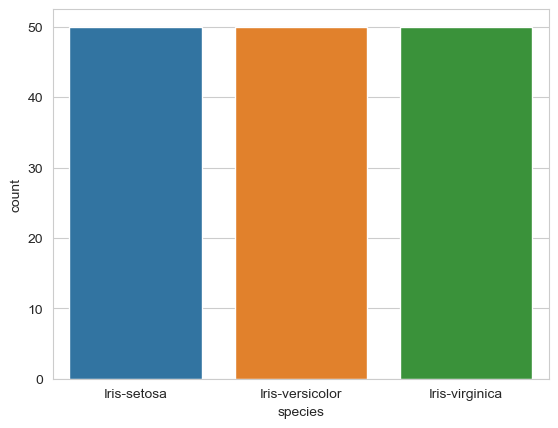

In [11]:
sns.set_style("whitegrid")
sns.countplot(data = df, x = "species")

<AxesSubplot:xlabel='species', ylabel='count'>

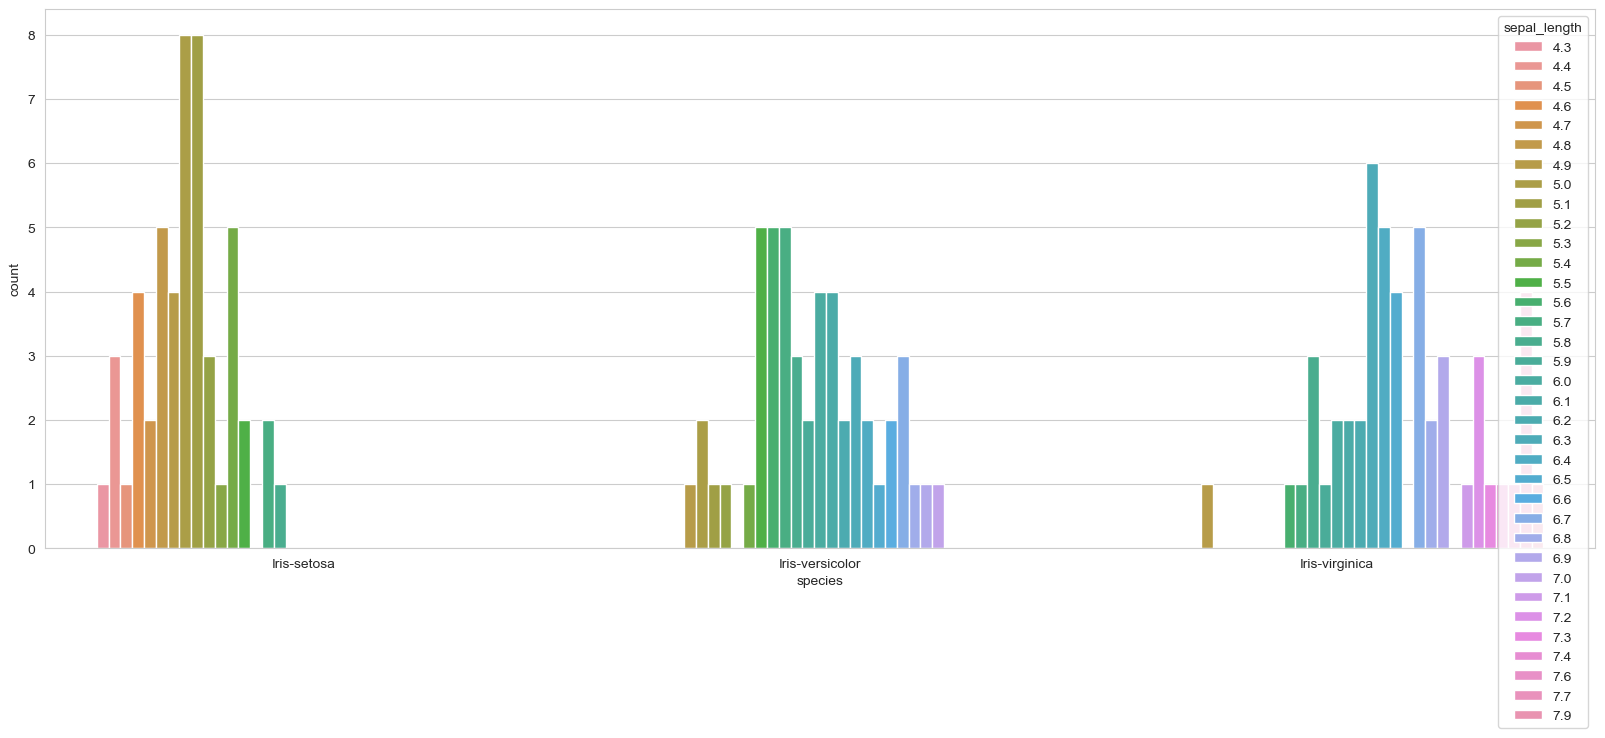

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
sns.countplot(data = df, x = "species", hue="sepal_length")

<AxesSubplot:xlabel='species', ylabel='count'>

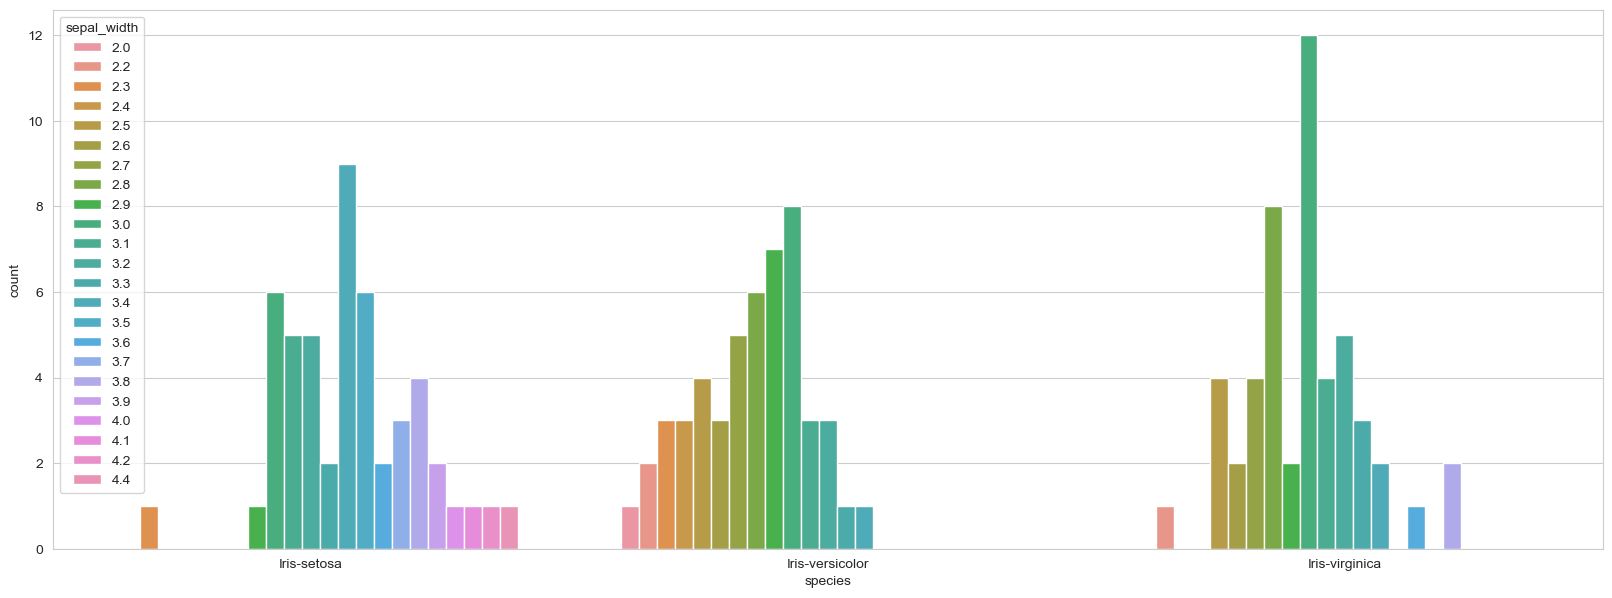

In [21]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
sns.countplot(data = df, x = "species", hue="sepal_width")

<AxesSubplot:xlabel='species', ylabel='count'>

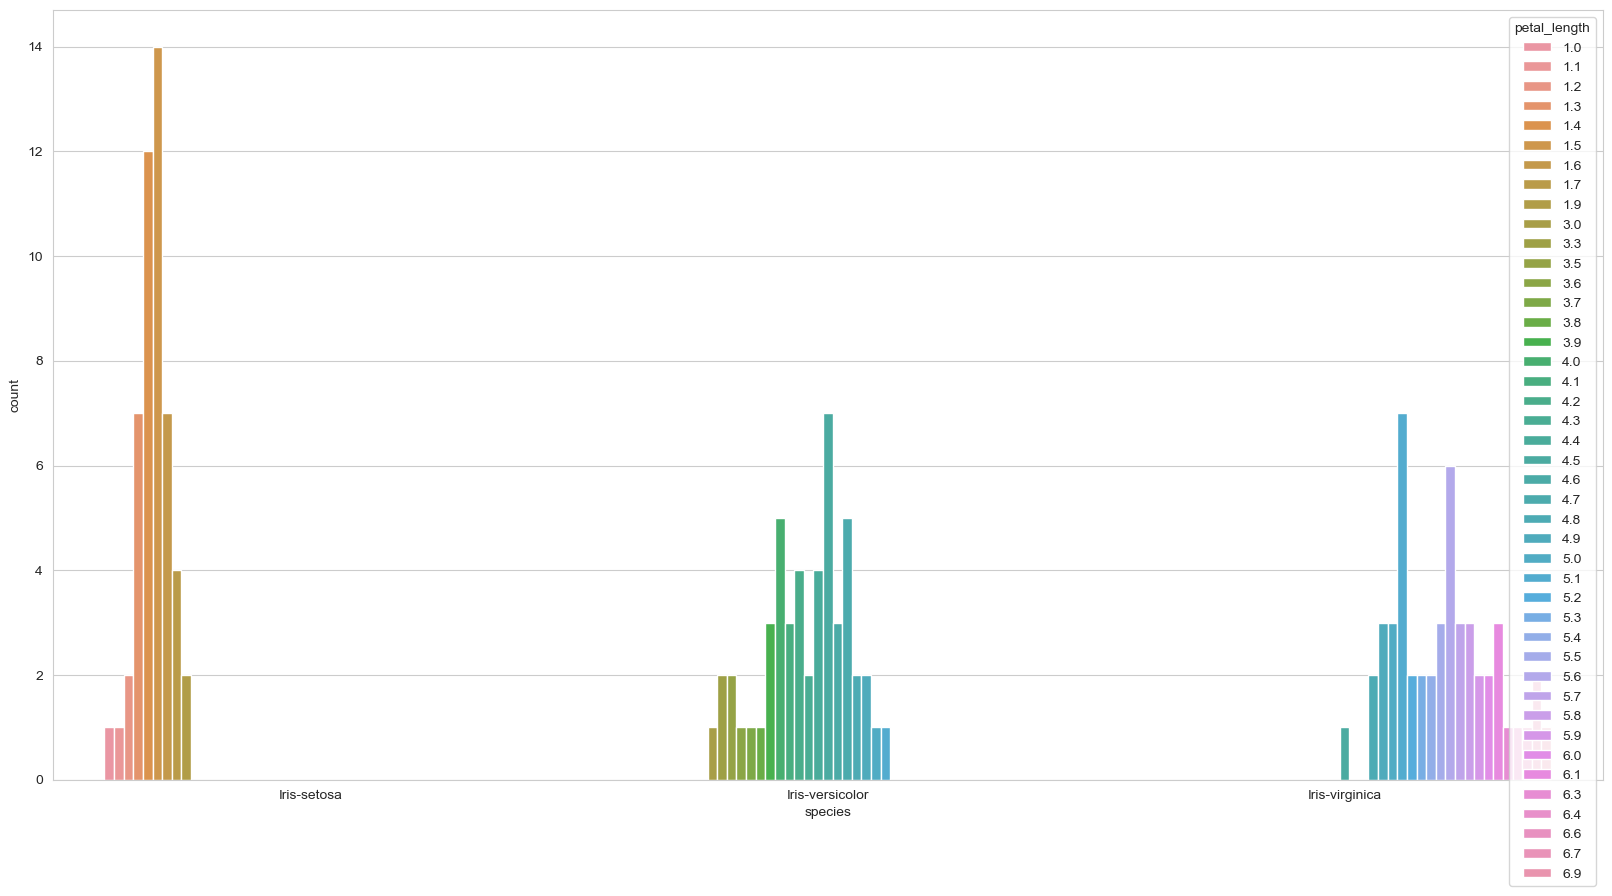

In [18]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(data = df, x = "species", hue="petal_length")

<AxesSubplot:xlabel='species', ylabel='count'>

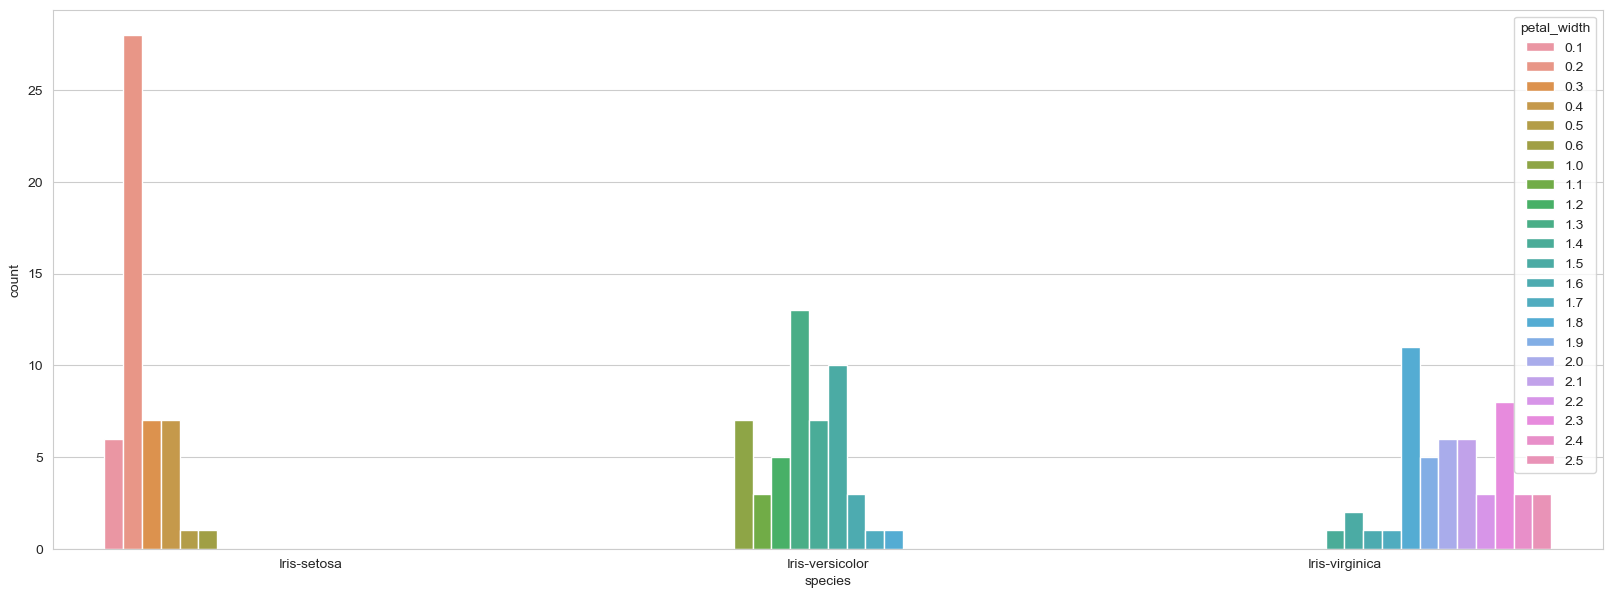

In [19]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,7))
sns.countplot(data = df, x = "species", hue="petal_width")

## Handeling Outliers in the dataset

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


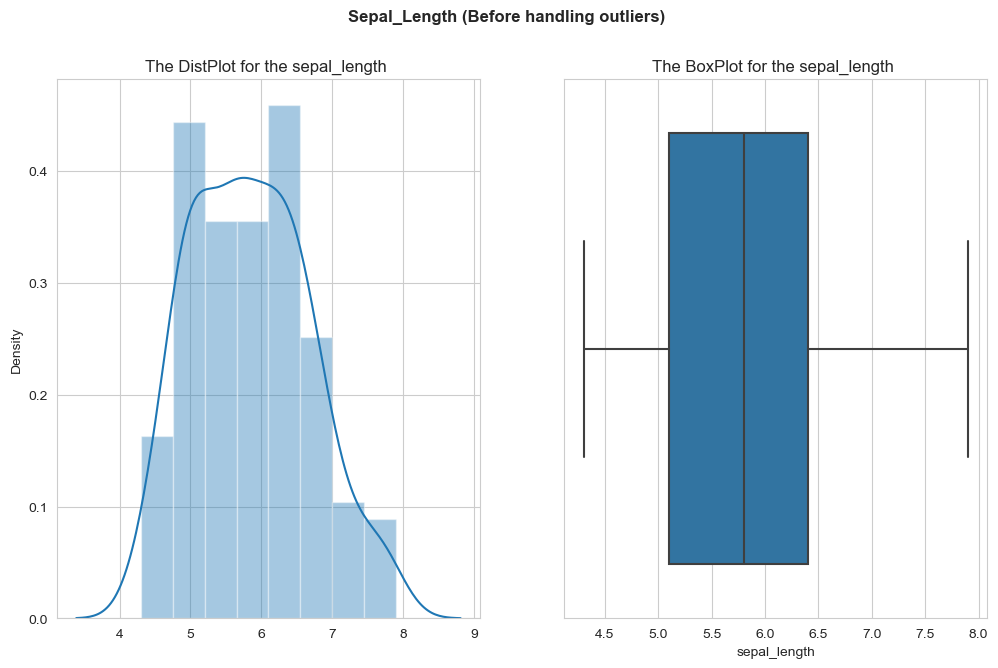

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


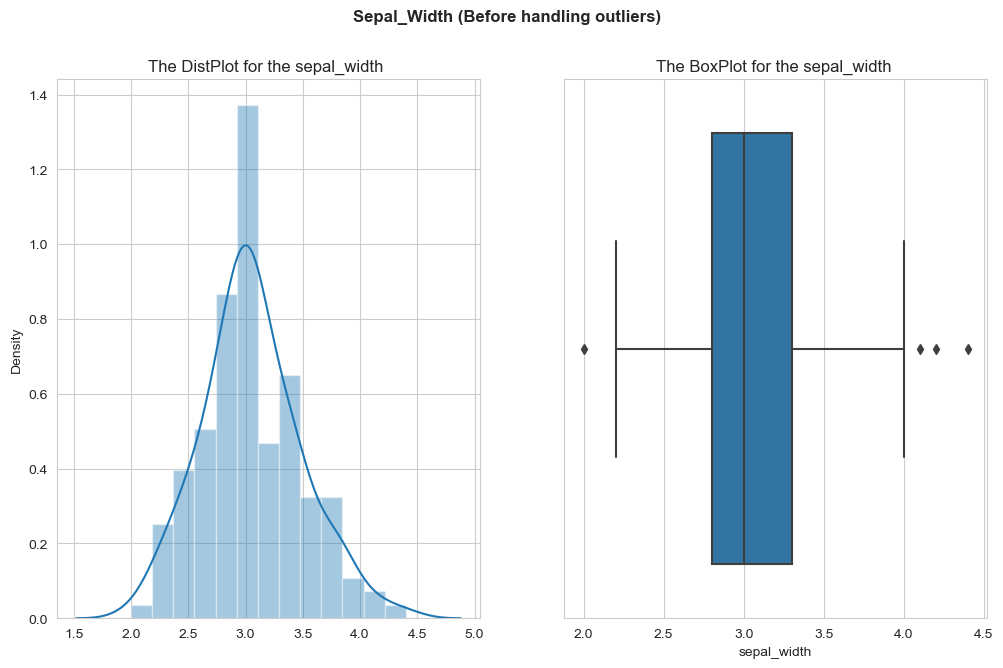

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


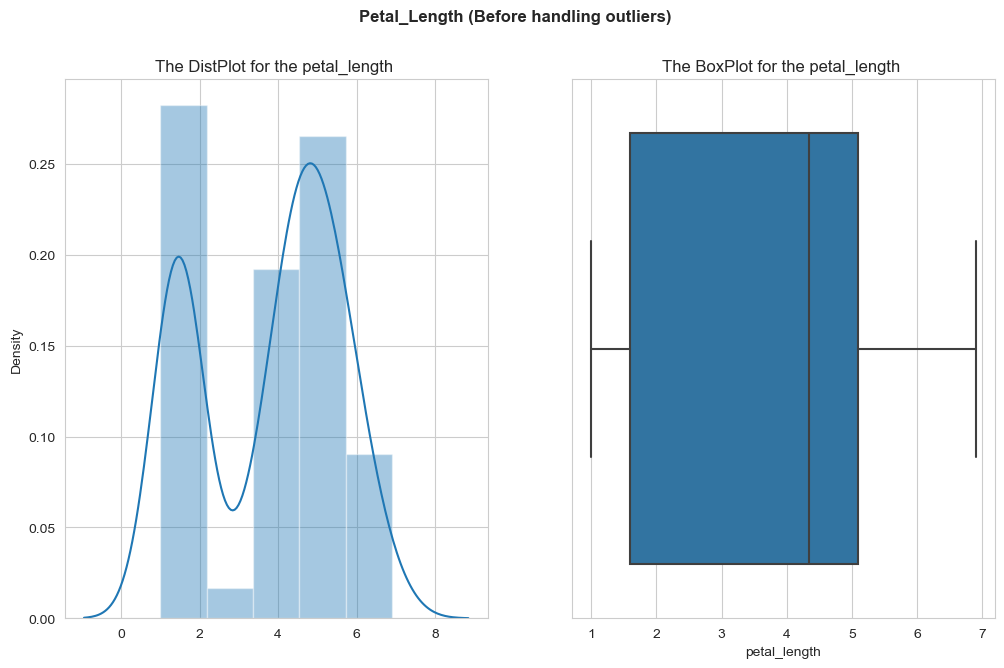

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


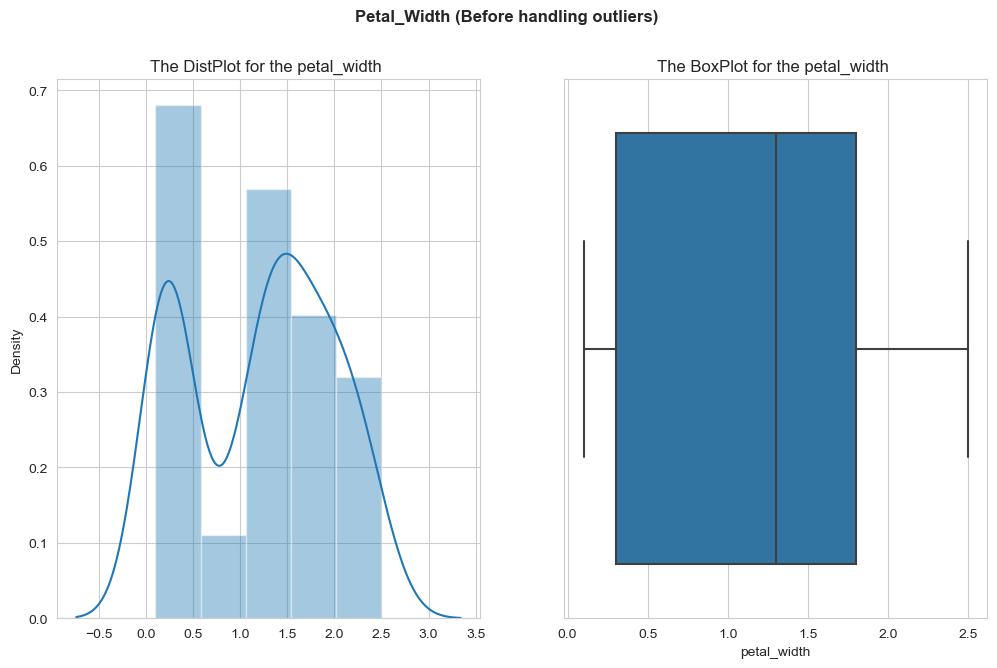

In [24]:
for col in df.select_dtypes(exclude = "object" ):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(x = df[col]);
    plt.title(f'The DistPlot for the {col} ')
    plt.subplot(1,2,2)
    sns.boxplot(x = df[col]);
    plt.title(f'The BoxPlot for the {col} ')
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    plt.show()

In [25]:
def outlier_handle(data):
    df1_copy = df.copy()
    for col_name in data.select_dtypes(exclude="object"):
        q1 = data[col_name].quantile(0.25)
        q3 = data[col_name].quantile(0.75)
        iqr = q3-q1  #IQR
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df1_copy.loc[:,  col_name] = np.where(data[col_name]> fence_high, fence_high,
                                         np.where(data[col_name]< fence_low, fence_low,
                                                  data[col_name]))
    return df1_copy
df1 = outlier_handle(df)

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


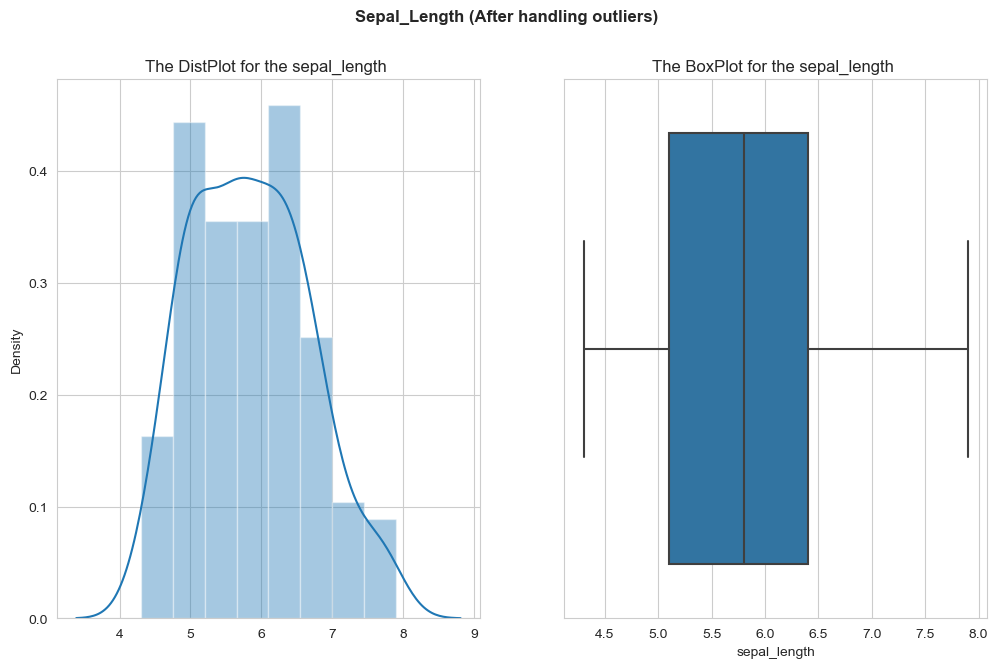

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


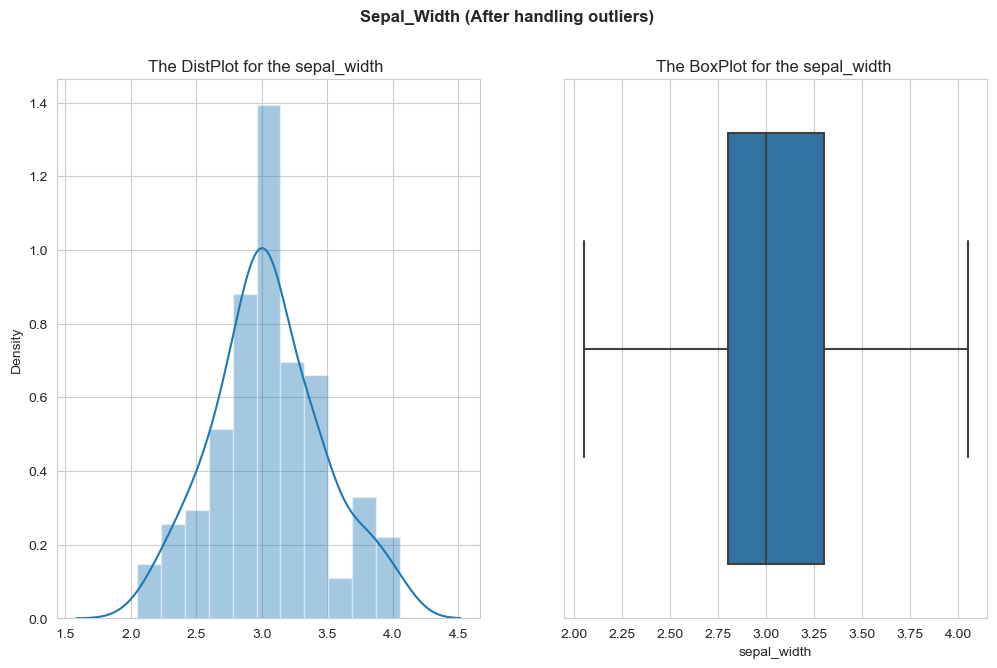

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


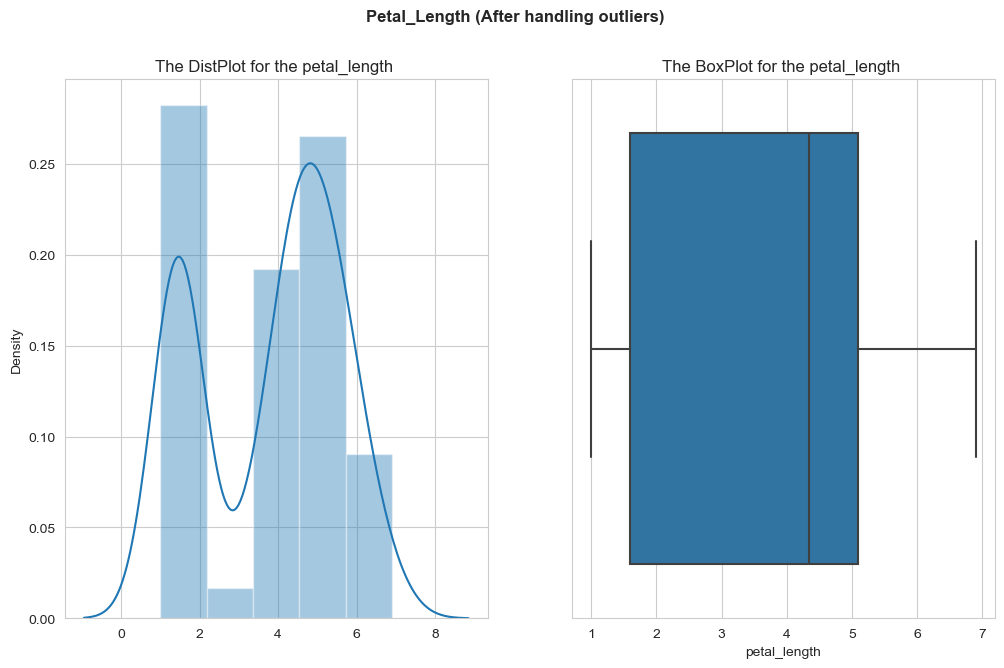

C:\Users\91885\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


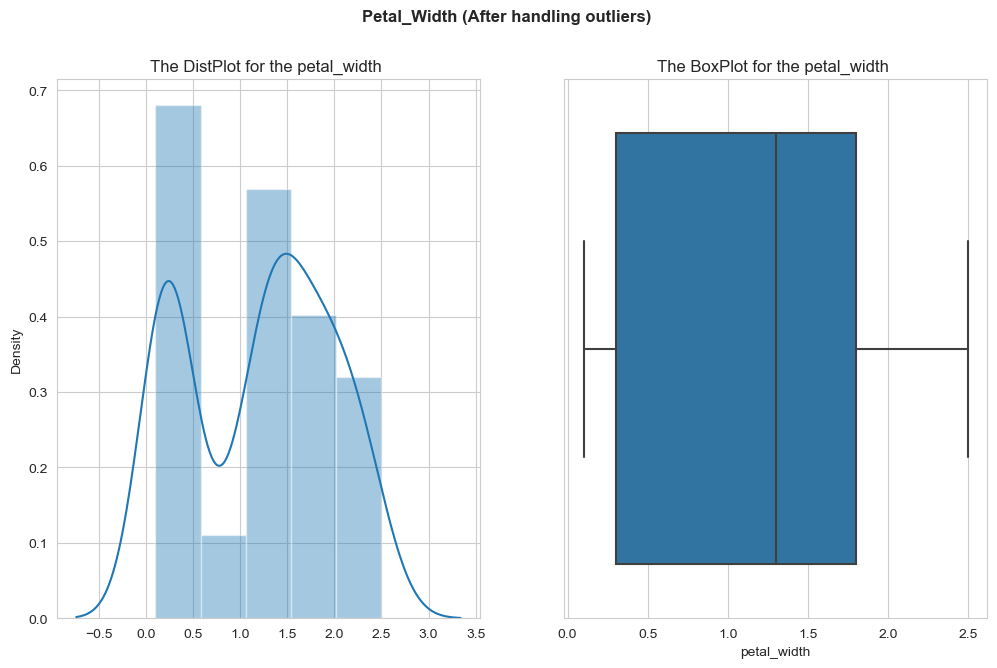

In [26]:
for col in df1.select_dtypes(exclude = "object" ):
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    sns.distplot(x = df1[col]);
    plt.title(f'The DistPlot for the {col} ')
    plt.subplot(1,2,2)
    sns.boxplot(x = df1[col]);
    plt.title(f'The BoxPlot for the {col} ')
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    plt.show()

<Figure size 1500x1500 with 0 Axes>

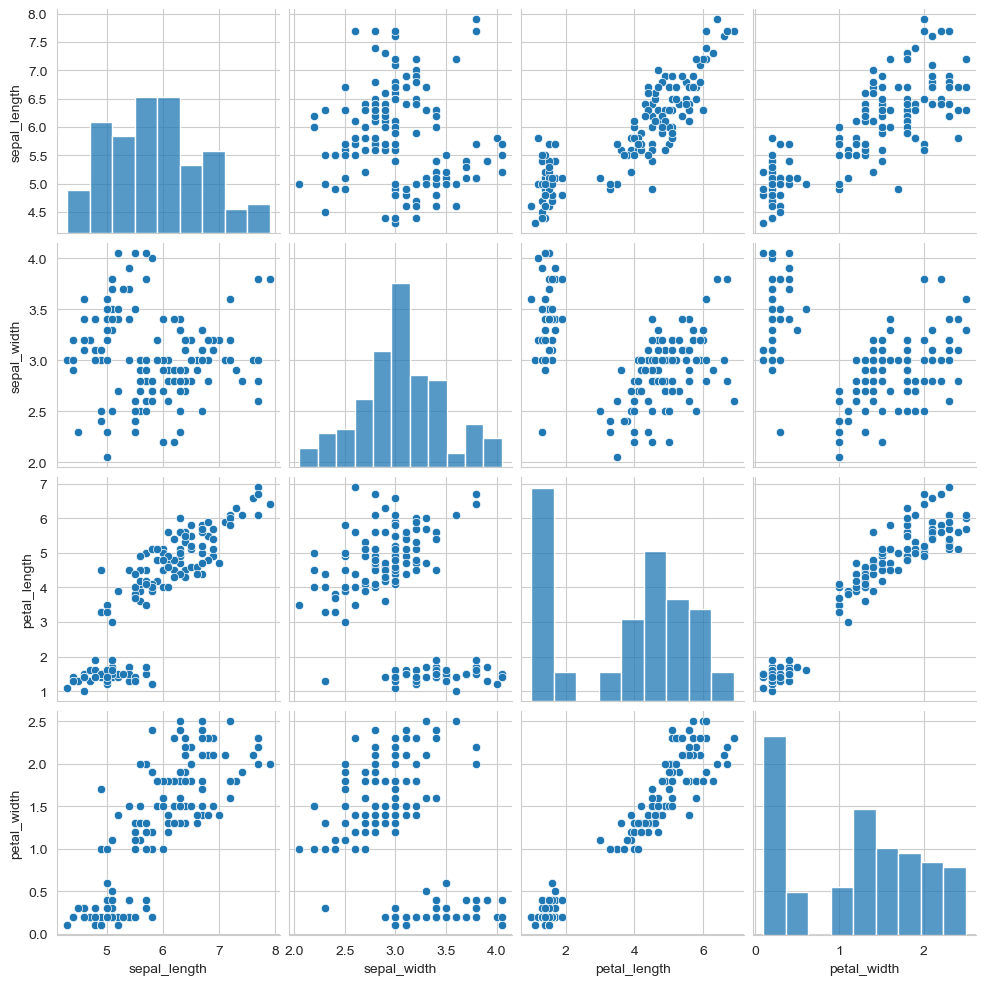

In [27]:
plt.figure(figsize=(15,15))
sns.pairplot(df1)
plt.show()

## Data Modeling

### Logistic Regression Model

In [28]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [29]:
X = df1.iloc[:,:-1]
Y = df1['species']

In [30]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [31]:
Y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [32]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=50)

In [33]:
print("x_train =", x_train.shape)
print("x_test =", x_test.shape)
print()
print("y_train =", y_train.shape)
print("y_test =", y_test.shape)

x_train = (112, 4)
x_test = (38, 4)

y_train = (112,)
y_test = (38,)


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [35]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(x_train, y_train)

LogisticRegression()

In [36]:
y_pred = logistic_regressor.predict(x_test)
lr = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
lr

,y_test,y_pred
88,Iris-versicolor,Iris-versicolor
72,Iris-versicolor,Iris-versicolor
20,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa
147,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
113,Iris-virginica,Iris-virginica
23,Iris-setosa,Iris-setosa
12,Iris-setosa,Iris-setosa
68,Iris-versicolor,Iris-versicolor


In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 0, 12,  3],
       [ 0,  1, 11]], dtype=int64)

<AxesSubplot:>

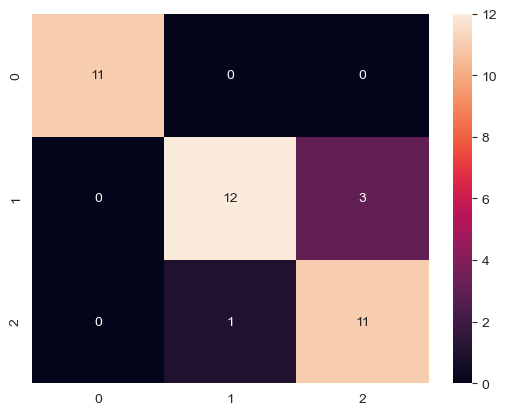

In [40]:
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d', annot=True)

In [41]:
from sklearn.metrics import classification_report

#### Evaluation

In [42]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      0.80      0.86        15
 Iris-virginica       0.79      0.92      0.85        12

       accuracy                           0.89        38
      macro avg       0.90      0.91      0.90        38
   weighted avg       0.90      0.89      0.90        38



### Random Forest model

In [43]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X,Y , test_size= 0.25 ,random_state=50)

In [44]:
print("x_train =", x_train.shape)
print("x_test =", x_test.shape)
print()
print("y_train =", y_train.shape)
print("y_test =", y_test.shape)

x_train = (112, 4)
x_test = (38, 4)

y_train = (112,)
y_test = (38,)


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = rf_classifier.predict(x_test)
rf = pd.DataFrame({'y_test':y_test,'y_pred':y_pred})
rf

,y_test,y_pred
88,Iris-versicolor,Iris-versicolor
72,Iris-versicolor,Iris-versicolor
20,Iris-setosa,Iris-setosa
16,Iris-setosa,Iris-setosa
147,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
113,Iris-virginica,Iris-virginica
23,Iris-setosa,Iris-setosa
12,Iris-setosa,Iris-setosa
68,Iris-versicolor,Iris-versicolor


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9473684210526315


### Prediction of Iris Flower

In [70]:
print("Welcome to Iris Flower Type Predictor!")
print("Fill in the details to predict the Iris flower type.")
print()
sepal_length = float(input("Enter sepal length (cm): "))
sepal_width = float(input("Enter sepal width (cm): "))
petal_length = float(input("Enter petal length (cm): "))
petal_width = float(input("Enter petal width (cm): "))
iris_features = [[sepal_length, sepal_width, petal_length, petal_width]]
predicted_class = rf_classifier.predict(iris_features)
iris_species = {
    0: 'Iris-setosa',
    1: 'Iris-versicolor',
    2: 'Iris-virginica'
}
print()
if predicted_class[0] in iris_species:
    predicted_species = iris_species[predicted_class[0]]
    print("Predicted Iris Flower Type:", predicted_species)
else:
    print("Unknown prediction. Please ensure your input values are within the expected range.")

Welcome to Iris Flower Type Predictor!
Fill in the details to predict the Iris flower type.

Enter sepal length (cm): 4.8
Enter sepal width (cm): 3.4
Enter petal length (cm): 1.6
Enter petal width (cm): 0.2

Unknown prediction. Please ensure your input values are within the expected range.


## Result

Based on the results, Random Forest has better accuracy than Logistic Regression for the Iris dataset.